In [1]:
from datetime import datetime
import re
import pandas as pd

def preprocess(data):
    pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

    messages = re.split(pattern, data)[1:]
    dates = re.findall(pattern, data)

    df = pd.DataFrame({'user_message': messages, 'message_date': dates})
    
    # Parse dates, handle parsing errors by setting invalid dates to NaT (Not a Time)
    df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%y, %H:%M - ', errors='coerce')
    df = df.dropna(subset=['message_date'])  # Drop rows with invalid dates

    df.rename(columns={'message_date': 'date'}, inplace=True)

    users = []
    messages = []
    for message in df['user_message']:
        entry = re.split('([\w\W]+?):\s', message)
        if entry[1:]:  # user name
            users.append(entry[1])
            messages.append(" ".join(entry[2:]))
        else:
            users.append('group_notification')
            messages.append(entry[0])

    df['user'] = users
    df['message'] = messages
    df.drop(columns=['user_message'], inplace=True)

    df['only_date'] = df['date'].dt.date
    df['year'] = df['date'].dt.year
    df['month_num'] = df['date'].dt.month
    df['month'] = df['date'].dt.month_name()
    df['day'] = df['date'].dt.day
    df['day_name'] = df['date'].dt.day_name()
    df['hour'] = df['date'].dt.hour
    df['minute'] = df['date'].dt.minute

    period = []
    for hour in df[['day_name', 'hour']]['hour']:
        if hour == 23:
            period.append(str(hour) + "-" + str('00'))
        elif hour == 0:
            period.append(str('00') + "-" + str(hour + 1))
        else:
            period.append(str(hour) + "-" + str(hour + 1))

    df['period'] = period

    return df


In [2]:
f = open('WhatsApp Chat with Devesh lko.txt','r',encoding='utf-8')

In [3]:
data  =f.read()
# df = pd.DataFrame(data)

In [4]:
preprocess(data)
# chats = pd.to_csv('chats.csv')

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute,period
0,2022-12-10 08:58:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022-12-10,2022,12,December,10,Saturday,8,58,8-9
1,2022-12-10 08:58:00,Devesh lko,Hlo\n,2022-12-10,2022,12,December,10,Saturday,8,58,8-9
2,2022-12-10 09:15:00,Abhiraj Sachan,class mai hu\n,2022-12-10,2022,12,December,10,Saturday,9,15,9-10
3,2022-12-10 09:15:00,Abhiraj Sachan,bhai\n,2022-12-10,2022,12,December,10,Saturday,9,15,9-10
34,2022-05-11 23:40:00,Abhiraj Sachan,https://youtube.com/shorts/B_FhbfI_e0E?feature...,2022-05-11,2022,5,May,11,Wednesday,23,40,23-00
...,...,...,...,...,...,...,...,...,...,...,...,...
8738,2024-12-04 17:57:00,Abhiraj Sachan,😂\n,2024-12-04,2024,12,December,4,Wednesday,17,57,17-18
8739,2024-12-04 17:59:00,Devesh lko,<Media omitted>\n,2024-12-04,2024,12,December,4,Wednesday,17,59,17-18
8740,2024-12-04 18:33:00,Abhiraj Sachan,<Media omitted>\n,2024-12-04,2024,12,December,4,Wednesday,18,33,18-19
8741,2024-12-04 21:12:00,Abhiraj Sachan,https://x.com/terakyalenadena/status/177871684...,2024-12-04,2024,12,December,4,Wednesday,21,12,21-22


In [5]:
with open('WhatsApp Chat with Devesh lko.txt', 'r', encoding='utf-8') as f:
    data = f.read()
    df = preprocess(data)  # Assuming preprocess() function preprocesses the data and returns a DataFrame

# Store the DataFrame as a CSV file
df.to_csv('preprocessed_data.csv', index=False)

In [6]:
new_df = pd.read_csv('preprocessed_data.csv')

In [7]:
new_df

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute,period
0,2022-12-10 08:58:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022-12-10,2022,12,December,10,Saturday,8,58,8-9
1,2022-12-10 08:58:00,Devesh lko,Hlo\n,2022-12-10,2022,12,December,10,Saturday,8,58,8-9
2,2022-12-10 09:15:00,Abhiraj Sachan,class mai hu\n,2022-12-10,2022,12,December,10,Saturday,9,15,9-10
3,2022-12-10 09:15:00,Abhiraj Sachan,bhai\n,2022-12-10,2022,12,December,10,Saturday,9,15,9-10
4,2022-05-11 23:40:00,Abhiraj Sachan,https://youtube.com/shorts/B_FhbfI_e0E?feature...,2022-05-11,2022,5,May,11,Wednesday,23,40,23-00
...,...,...,...,...,...,...,...,...,...,...,...,...
3142,2024-12-04 17:57:00,Abhiraj Sachan,😂\n,2024-12-04,2024,12,December,4,Wednesday,17,57,17-18
3143,2024-12-04 17:59:00,Devesh lko,<Media omitted>\n,2024-12-04,2024,12,December,4,Wednesday,17,59,17-18
3144,2024-12-04 18:33:00,Abhiraj Sachan,<Media omitted>\n,2024-12-04,2024,12,December,4,Wednesday,18,33,18-19
3145,2024-12-04 21:12:00,Abhiraj Sachan,https://x.com/terakyalenadena/status/177871684...,2024-12-04,2024,12,December,4,Wednesday,21,12,21-22


In [8]:
df[df['user'] == 'Devesh lko'].shape[0]

1316

In [9]:
words=[]
for message in df['message']:
    words.extend(message.split())

In [10]:
len(words)

14837

In [11]:
df[df['message'] == '<Media omitted>\n'].shape[0]

186

In [12]:
pip install urlextract

Note: you may need to restart the kernel to use updated packages.


In [13]:
from urlextract import URLExtract

In [14]:
extractor = URLExtract()
urls = extractor.find_urls("find all www.xhamsgter.com")
urls

['www.xhamsgter.com']

In [15]:
links=[]
for message in df['message']:
    links.extend(extractor.find_urls(message))
len(links)
    

164

In [16]:
# df[df['user'] == 'Abhiraj Sachan']
df.groupby(['user']).count()

,date,message,only_date,year,month_num,month,day,day_name,hour,minute,period
user,,,,,,,,,,,
Abhiraj Sachan,1830,1830,1830,1830,1830,1830,1830,1830,1830,1830,1830
Devesh lko,1316,1316,1316,1316,1316,1316,1316,1316,1316,1316,1316
group_notification,1,1,1,1,1,1,1,1,1,1,1


In [17]:
x= df['user'].value_counts().head()

In [18]:
import matplotlib.pyplot as plt

([0, 1, 2],
 [Text(0, 0, 'Abhiraj Sachan'),
  Text(1, 0, 'Devesh lko'),
  Text(2, 0, 'group_notification')])

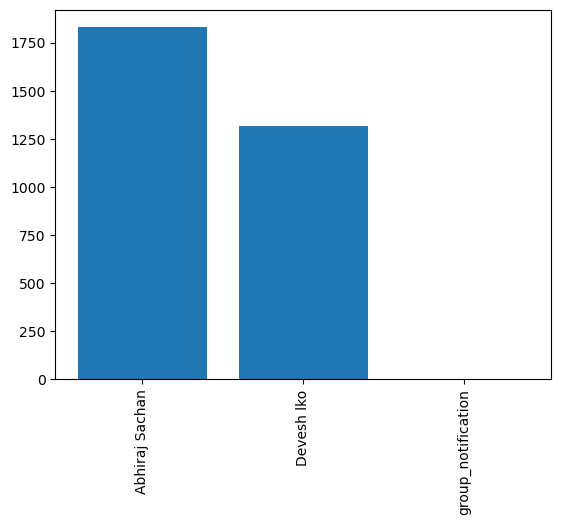

In [19]:
name = x.index
count = x.values
plt.bar(name,count)
plt.xticks(rotation='vertical')

In [20]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


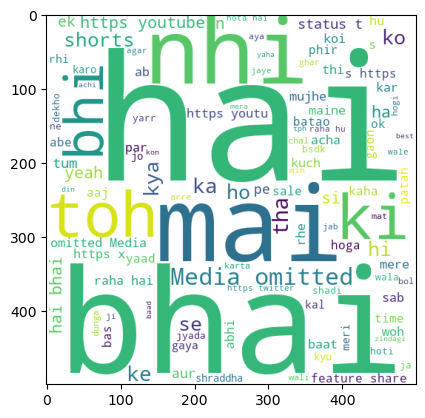

In [21]:
from wordcloud import WordCloud
if 'Abhiraj Sachan' != 'Overall':
    df = df[df['user'] == 'Abhiraj Sachan']
wc = WordCloud(width=500, height=500,min_font_size=10,background_color='white')
df_wc = wc.generate(df['message'].str.cat(sep=" "))
plt.imshow(df_wc)
    


In [22]:
# create_wordcloud('Overall',df)

In [23]:
word=[]
for i in df['message']:
    print(i.split())
    word.append(i)

['class', 'mai', 'hu']
['bhai']
['https://youtube.com/shorts/B_FhbfI_e0E?feature=share']
['privatisation', 'on', 'its', 'peak', '😆😆😆']
['😆']
['<Media', 'omitted>']
['bhai', 'tarun', 'behen', 'ka', 'lauda', 'hai', 'ek', 'number', 'ka']
['Maurya', 'bhi']
['bhai', 'keta']
['khana', 'kha', 'li']
['15', 'min', 'mai']
['ok']
['<Media', 'omitted>']
['yarr', 'aaj', 'nhi', 'aya']
['earthquake']
['2', 'earthquake', 'in', 'less', 'than', 'gap', 'of', '1', 'week']
['😂😂😂😂😂']
['😅']
['bhai', 'kal', 'dukan', 'gaya', 'tha']
['bhaiya', 'ne', 'kaha', 'ki']
['40', 'rupe', 'ho', 'gaye', 'baaki', 'apki', 'shraddha']
['waise', 'shraddha', 'aapki', 'nhi', 'hai', '🥲']
['bhai', 'woh', 'app', 'kholo']
['yarr']
['tumbhi', 'experience', 'lo']
['chudti', 'hui', 'ldki', 'ki', 'awaz', 'kaise', 'hoti', 'hai']
['bhai', 'tum', 'akele', 'ho']
['please', 'bro']
['one', 'last', 'dance', '😉']
['h', 'chudti', 'jah']
['awaz', 'aaygi']
['khok', 'n', 'bsdk', 'natak', 'kr', 'raha', 'hai']
['nhi', 'toh', 'asli', 'ldki', 'bhehu']


In [24]:
temp =df[df['user'] != 'group_notification']
temp[temp['message'] != '<Media omitted>\n']

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute,period
2,2022-12-10 09:15:00,Abhiraj Sachan,class mai hu\n,2022-12-10,2022,12,December,10,Saturday,9,15,9-10
3,2022-12-10 09:15:00,Abhiraj Sachan,bhai\n,2022-12-10,2022,12,December,10,Saturday,9,15,9-10
34,2022-05-11 23:40:00,Abhiraj Sachan,https://youtube.com/shorts/B_FhbfI_e0E?feature...,2022-05-11,2022,5,May,11,Wednesday,23,40,23-00
36,2022-06-11 13:28:00,Abhiraj Sachan,privatisation on its peak 😆😆😆\n,2022-06-11,2022,6,June,11,Saturday,13,28,13-14
37,2022-06-11 13:29:00,Abhiraj Sachan,😆\n,2022-06-11,2022,6,June,11,Saturday,13,29,13-14
...,...,...,...,...,...,...,...,...,...,...,...,...
8732,2024-12-04 00:47:00,Abhiraj Sachan,Bhai mai ab nhi dekhta porn\n,2024-12-04,2024,12,December,4,Wednesday,0,47,00-1
8735,2024-12-04 13:49:00,Abhiraj Sachan,https://x.com/nickhunterr/status/1778660955884...,2024-12-04,2024,12,December,4,Wednesday,13,49,13-14
8736,2024-12-04 13:55:00,Abhiraj Sachan,https://x.com/We_Homosapiens/status/1778633179...,2024-12-04,2024,12,December,4,Wednesday,13,55,13-14
8738,2024-12-04 17:57:00,Abhiraj Sachan,😂\n,2024-12-04,2024,12,December,4,Wednesday,17,57,17-18


In [25]:
f = open('stop_hinglish.txt','r')
stop_words=f.read()
print(stop_words)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [26]:
words=[]
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [27]:
print(words)

['class', 'https://youtube.com/shorts/b_fhbfi_e0e?feature=share', 'privatisation', 'peak', '😆😆😆', '😆', '<media', 'omitted>', 'tarun', 'behen', 'lauda', 'number', 'maurya', 'keta', 'khana', '15', '<media', 'omitted>', 'yarr', 'earthquake', 'earthquake', 'gap', 'week', '😂😂😂😂😂', '😅', 'dukan', 'bhaiya', '40', 'rupe', 'baaki', 'apki', 'shraddha', 'shraddha', 'aapki', '🥲', 'kholo', 'yarr', 'tumbhi', 'experience', 'chudti', 'ldki', 'awaz', 'akele', 'dance', '😉', 'chudti', 'awaz', 'aaygi', 'khok', 'bsdk', 'natak', 'asli', 'ldki', 'bhehu', 'room', 'khol', 'oandi', 'shandi', 'khola?::!', '<media', 'omitted>', 'khola', '😂', '😂😂😂😂', 'delete', 'krdo', 'phor', 'joga', 'bss', '😂', '😂😂😉', 'notes', '🤣🤣🤣', 'taha', 'amit', 'vedi', 'bhejdu', 'android', 'development', 'sikh', '🤣🤣🤣', 'credit', 'inclination', 'unknown', 'number', 'send', 'kardo', '🤣', '😂😂', 'atul', 'bhej', 'bolunga', 'class', 'kholkr', 'bacho', 'python', 'padhana', 'uski', 'biwi', 'bhehung', '😂😂😂', '🤣🤣', 'https://youtube.com/shorts/uzijx6izy

In [28]:
from collections import Counter
Counter(words).most_common(20)

[('😂', 126),
 ('<media', 82),
 ('omitted>', 82),
 ('😂😂', 56),
 ('😂😂😂', 34),
 ('baat', 22),
 ('gaon', 16),
 ('patah', 16),
 ('phir', 16),
 ('sale', 15),
 ('😆', 13),
 ('shraddha', 13),
 ('shi', 13),
 ('yarr', 12),
 ('bsdk', 12),
 ('shadi', 12),
 ('🥲', 10),
 ('😂😂😂😂', 9),
 ('tph', 9),
 ('achi', 9)]

In [29]:
def create_wordcloud(selected_user, df):
    if selected_user != "Overall":
        df = df[df['user'] == selected_user]
    wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
    df_wc = wc.generate(df['message'].str.cat(sep=" "))
    return df_wc

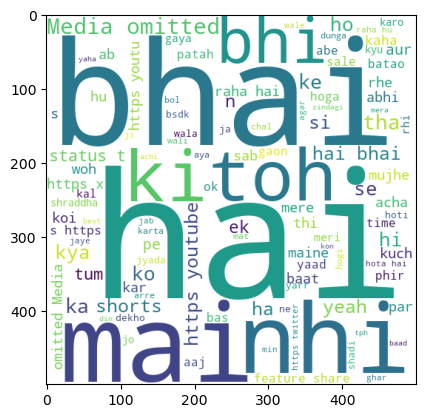

In [30]:
r = create_wordcloud('Overall',df)
plt.imshow(r)

In [31]:
def fetch_mostbusyusers(df):
    x = df['user'].value_counts().head()
    df = round((df['user'].value_counts() / df.shape[0]) * 100, 2).reset_index().rename(
        columns={'index': 'name', 'user': 'percent'}
    )
    ans = pd.DataFrame(df)
    return ans

In [32]:
fetch_mostbusyusers(df)

,percent,count
0,Abhiraj Sachan,100.0


In [33]:
x = temp['user'].value_counts()

In [34]:
x

user
Abhiraj Sachan    1830
Name: count, dtype: int64

In [35]:
df

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute,period
2,2022-12-10 09:15:00,Abhiraj Sachan,class mai hu\n,2022-12-10,2022,12,December,10,Saturday,9,15,9-10
3,2022-12-10 09:15:00,Abhiraj Sachan,bhai\n,2022-12-10,2022,12,December,10,Saturday,9,15,9-10
34,2022-05-11 23:40:00,Abhiraj Sachan,https://youtube.com/shorts/B_FhbfI_e0E?feature...,2022-05-11,2022,5,May,11,Wednesday,23,40,23-00
36,2022-06-11 13:28:00,Abhiraj Sachan,privatisation on its peak 😆😆😆\n,2022-06-11,2022,6,June,11,Saturday,13,28,13-14
37,2022-06-11 13:29:00,Abhiraj Sachan,😆\n,2022-06-11,2022,6,June,11,Saturday,13,29,13-14
...,...,...,...,...,...,...,...,...,...,...,...,...
8735,2024-12-04 13:49:00,Abhiraj Sachan,https://x.com/nickhunterr/status/1778660955884...,2024-12-04,2024,12,December,4,Wednesday,13,49,13-14
8736,2024-12-04 13:55:00,Abhiraj Sachan,https://x.com/We_Homosapiens/status/1778633179...,2024-12-04,2024,12,December,4,Wednesday,13,55,13-14
8738,2024-12-04 17:57:00,Abhiraj Sachan,😂\n,2024-12-04,2024,12,December,4,Wednesday,17,57,17-18
8740,2024-12-04 18:33:00,Abhiraj Sachan,<Media omitted>\n,2024-12-04,2024,12,December,4,Wednesday,18,33,18-19


In [46]:
timeline = df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [47]:
timeline

,year,month_num,month,message
0,2022,2,February,2
1,2022,5,May,1
2,2022,6,June,3
3,2022,7,July,4
4,2022,8,August,6
5,2022,9,September,3
6,2022,12,December,3
7,2023,1,January,166
8,2023,2,February,24
9,2023,3,March,59


In [52]:
time=[]
for i in range(timeline.shape[0]):
    time.append(timline['month'][i] + "-" + str(timeline['year'][i]))

In [61]:
timeline['time'] = time

In [62]:
timeline

,year,month_num,month,message,time
0,2022,2,February,2,February-2022
1,2022,5,May,1,May-2022
2,2022,6,June,3,June-2022
3,2022,7,July,4,July-2022
4,2022,8,August,6,August-2022
5,2022,9,September,3,September-2022
6,2022,12,December,3,December-2022
7,2023,1,January,166,January-2023
8,2023,2,February,24,February-2023
9,2023,3,March,59,March-2023


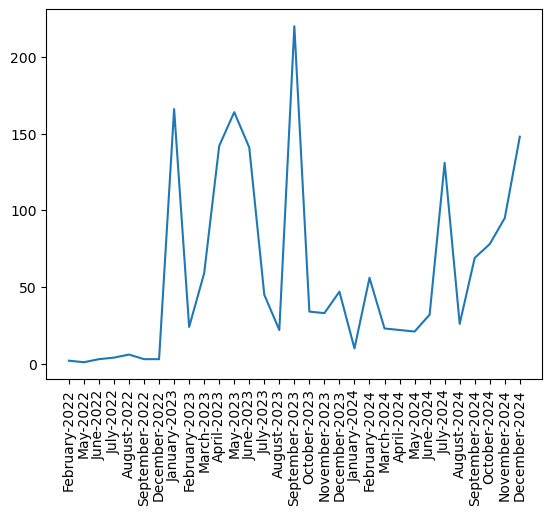

In [66]:
plt.plot(timeline['time'] ,timeline['message'])
plt.xticks(rotation="vertical")
plt.show()

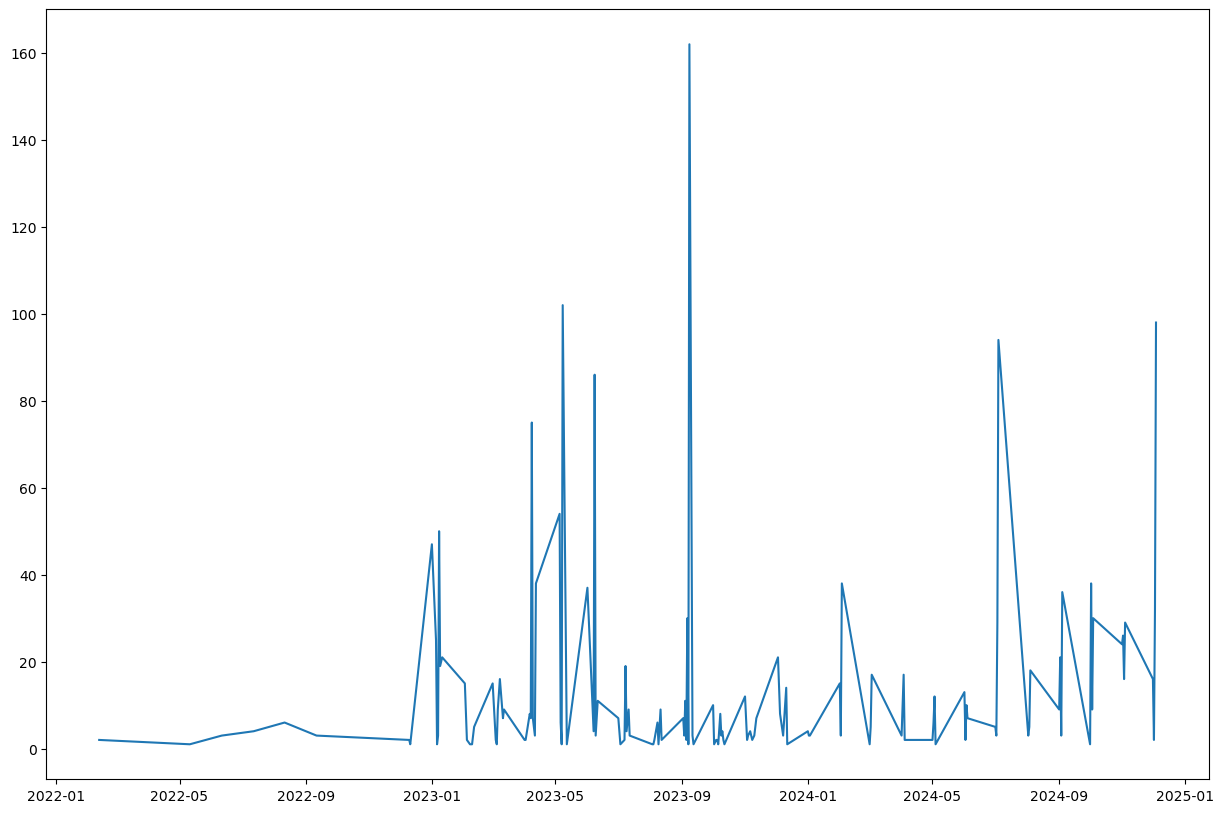

In [72]:
df['only_date'] = df['date'].dt.date
daily_timeline = df.groupby('only_date').count()['message'].reset_index()
daily_timeline
plt.figure(figsize=(15,10))
plt.plot(daily_timeline['only_date'], daily_timeline['message'])